In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

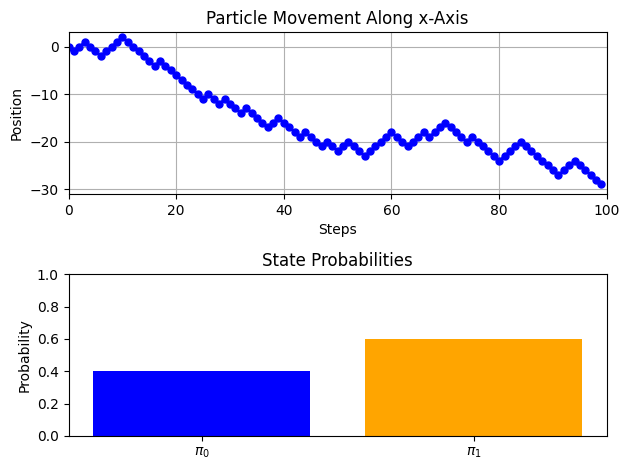

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
alpha = 0.3  # Probability of reversal when moving to the right
beta = 0.2   # Probability of reversal when moving to the left
num_steps = 100  # Number of steps in the animation

# Transition matrix
P = np.array([[1 - alpha, alpha],
              [beta, 1 - beta]])

# Initial state probabilities
pi = np.array([beta / (alpha + beta), alpha / (alpha + beta)])

# Initial state
state = 1  # 1 for moving right (E1), -1 for moving left (E2)
position = 0

# To store positions and probabilities for animation
positions = [position]
pi_values = [pi]

# Simulate particle movement
for _ in range(num_steps):
    if state == 1:
        if np.random.rand() < alpha:
            state = -1  # Reverse direction
    else:
        if np.random.rand() < beta:
            state = 1  # Reverse direction

    position += state  # Move particle
    positions.append(position)
    
    # Update state probabilities
    pi = pi @ P
    pi_values.append(pi)

# Animation function
def update(frame):
    plt.clf()
    pi = pi_values[frame]
    
    # Plot particle movement
    plt.subplot(2, 1, 1)
    plt.plot(positions[:frame], 'bo-', markersize=5)
    plt.xlim(0, num_steps)
    plt.ylim(min(positions) - 1, max(positions) + 1)
    plt.xlabel('Steps')
    plt.ylabel('Position')
    plt.title('Particle Movement Along x-Axis')
    plt.grid(True)
    
    # Plot state probabilities
    plt.subplot(2, 1, 2)
    plt.bar(['$\pi_0$', '$\pi_1$'], pi, color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.ylabel('Probability')
    plt.title('State Probabilities')
    plt.tight_layout()

# Create animation
fig = plt.figure()
ani = FuncAnimation(fig, update, frames=len(pi_values), repeat=False, interval=100)

# Save animation using PillowWriter
writer = PillowWriter(fps=10)
ani.save('particle_movement_with_probabilities.gif', writer=writer)

plt.show()


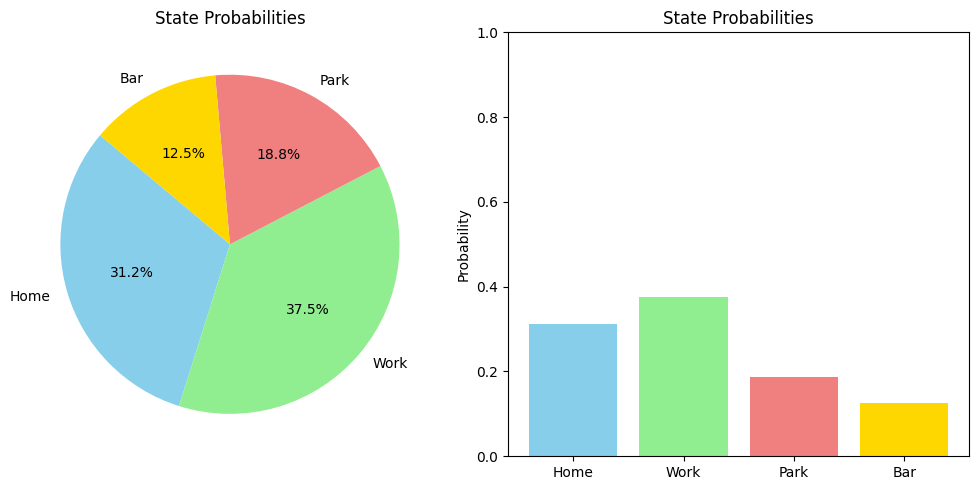

In [4]:
# Define the transition matrix
P = np.array([
    [0.5, 0.3, 0.1, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.3, 0.3, 0.3, 0.1],
    [0.2, 0.3, 0.2, 0.3]
])

# Initial state probabilities
pi = np.array([1, 0, 0, 0])

# Number of steps for the simulation
num_steps = 50

# Store the state probabilities for animation
pi_values = [pi]

# Simulate the user's movements
for _ in range(num_steps):
    pi = pi @ P
    pi_values.append(pi)

# Define the states
states = ['Home', 'Work', 'Park', 'Bar']

# Animation function
def update(frame):
    plt.clf()
    
    # Current state probabilities
    pi = pi_values[frame]
    
    # Create a pie chart for state probabilities
    plt.subplot(1, 2, 1)
    plt.pie(pi, labels=states, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.title('State Probabilities')
    
    # Create a bar plot for state probabilities
    plt.subplot(1, 2, 2)
    plt.bar(states, pi, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.ylim(0, 1)
    plt.ylabel('Probability')
    plt.title('State Probabilities')
    plt.tight_layout()

# Create animation
fig = plt.figure(figsize=(10, 5))
ani = FuncAnimation(fig, update, frames=len(pi_values), repeat=False, interval=200)

# Save animation using PillowWriter
writer = PillowWriter(fps=5)
ani.save('markov_chain_user_movements.gif', writer=writer)

plt.show()
